In [1]:
import pandas as pd
from fileio import load_data, convert_df_to_vw
from Expert import Expert
from ExpertAdvice import ExpertAdvice
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from constants import SPAMBASE, CLOUD, NUM_EXPERTS, SPAMBASE_LABEL_COL_NAME, CLOUD_LABEL_COL_NAME

In [2]:
df: pd.DataFrame; features: list[str]; training_examples: list[str]
dataset: str = SPAMBASE
label_name: str = SPAMBASE_LABEL_COL_NAME if dataset == SPAMBASE else CLOUD_LABEL_COL_NAME
df, features = load_data(dataset)
training_examples = convert_df_to_vw(df, features, label_name=label_name)

In [3]:
expert_learning_rates: list[float] = [0.1, 0.25, 0.5, 0.75, 1, 5]
experts: list[Expert] = [
    Expert(features=features, learning_rate=expert_learning_rates[i]) for i in range(NUM_EXPERTS)
]

In [4]:
learner_learning_rate: float = 0.5
learner: ExpertAdvice = ExpertAdvice(experts, alpha=0, learning_rate=learner_learning_rate)
for ex in training_examples:
    learner.learn(ex)

In [5]:
learner_history: pd.DataFrame; expert_histories: list[tuple[list[str], pd.DataFrame]]
learner_history, expert_histories = learner.get_log()
learner_history.head()

,true label,predicted label,cumulative loss,average loss,sample loss
0,1.0,0.500000,0.693147,0.693147,0.693147
1,0.0,0.529616,1.447352,0.723676,0.754205
2,0.0,0.737410,2.784514,0.928171,1.337162
3,0.0,0.193481,2.999542,0.749885,0.215027
4,0.0,0.407285,3.522584,0.704517,0.523042


In [6]:
learner_weights: pd.DataFrame; expert_weights: list[pd.DataFrame]
learner_weights, expert_weights = learner.get_weight_history()
learner_weights.head()

,Expert 1,Expert 2,Expert 3,Expert 4,Expert 5,Expert 6
0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2,0.170639,0.169230,0.167594,0.166454,0.165592,0.160490
3,0.221563,0.198108,0.172579,0.156644,0.145851,0.105253
4,0.190823,0.187025,0.177603,0.167747,0.159162,0.117640


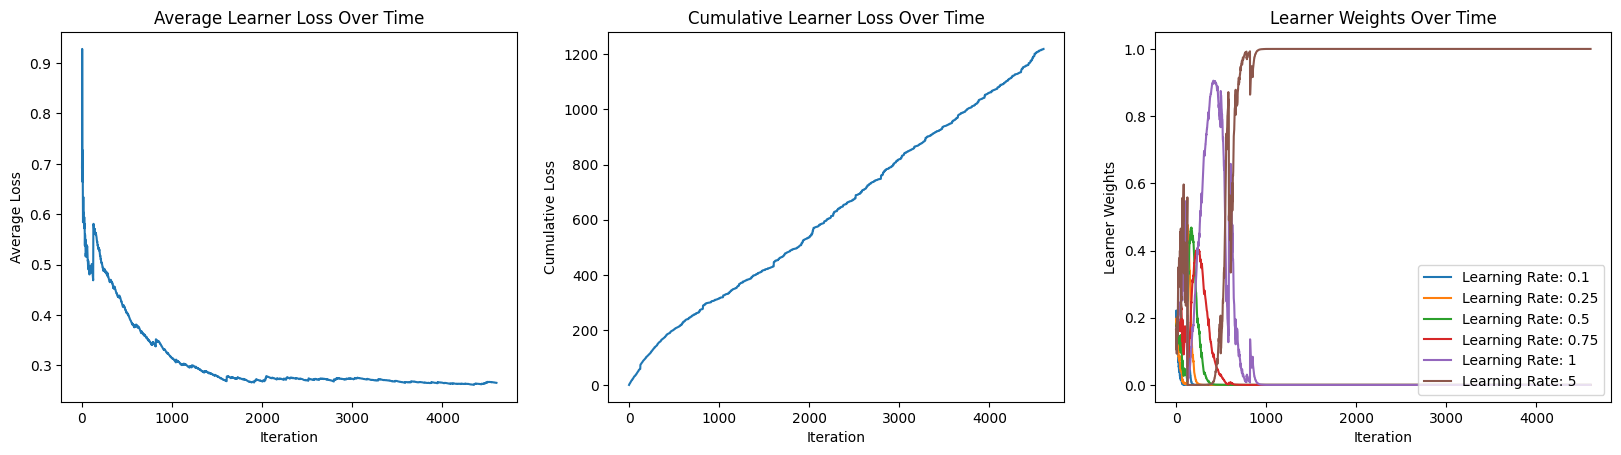

In [7]:
learner_fig: Figure; learner_avg_axs: Axes; learner_cumu_axs: Axes; learner_weights_axs: Axes
learner_fig, [learner_avg_axs, learner_cumu_axs, learner_weights_axs] = plt.subplots(1, 3)
learner_fig.set_figwidth(20)
learner_avg_axs.plot(learner_history.index, learner_history["average loss"])
learner_cumu_axs.plot(learner_history.index, learner_history["cumulative loss"])
for i in range(len(learner_weights.columns)):
    learner_weights_axs.plot(learner_weights.index, learner_weights[learner_weights.columns[i]], label=f"Learning Rate: {expert_learning_rates[i]}")
learner_avg_axs.set_title("Average Learner Loss Over Time")
learner_cumu_axs.set_title("Cumulative Learner Loss Over Time")
learner_weights_axs.set_title("Learner Weights Over Time")
learner_avg_axs.set_xlabel("Iteration")
learner_cumu_axs.set_xlabel("Iteration")
learner_weights_axs.set_xlabel("Iteration")
learner_avg_axs.set_ylabel("Average Loss")
learner_cumu_axs.set_ylabel("Cumulative Loss")
learner_weights_axs.set_ylabel("Learner Weights")
learner_weights_axs.legend(loc='lower right')
plt.show()

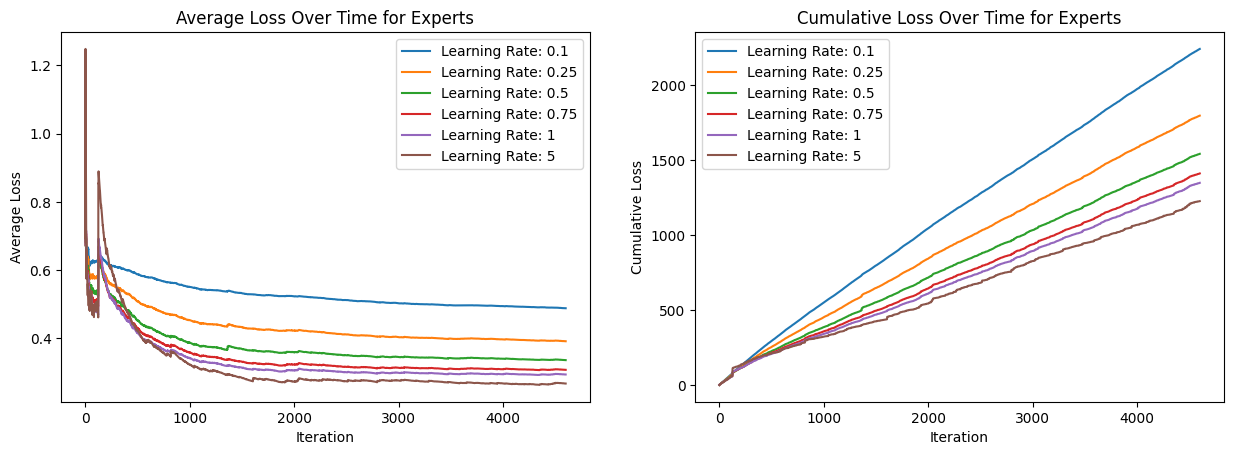

In [8]:
expert_losses_fig: Figure; expert_avg_axs: Axes; expert_cumu_axs: Axes
expert_losses_fig, [expert_avg_axs, expert_cumu_axs] = plt.subplots(1, 2)
expert_losses_fig.set_figwidth(15)
for i in range(len(expert_histories)):
    expert_avg_axs.plot(expert_histories[i][1].index, expert_histories[i][1]["average loss"], label=f"Learning Rate: {expert_learning_rates[i]}")
    expert_cumu_axs.plot(expert_histories[i][1].index, expert_histories[i][1]["cumulative loss"], label=f"Learning Rate: {expert_learning_rates[i]}")
expert_avg_axs.legend(loc='upper right')
expert_cumu_axs.legend(loc='upper left')
expert_avg_axs.set_title("Average Loss Over Time for Experts")
expert_cumu_axs.set_title("Cumulative Loss Over Time for Experts")
expert_avg_axs.set_xlabel("Iteration")
expert_cumu_axs.set_xlabel("Iteration")
expert_avg_axs.set_ylabel("Average Loss")
expert_cumu_axs.set_ylabel("Cumulative Loss")
plt.show()

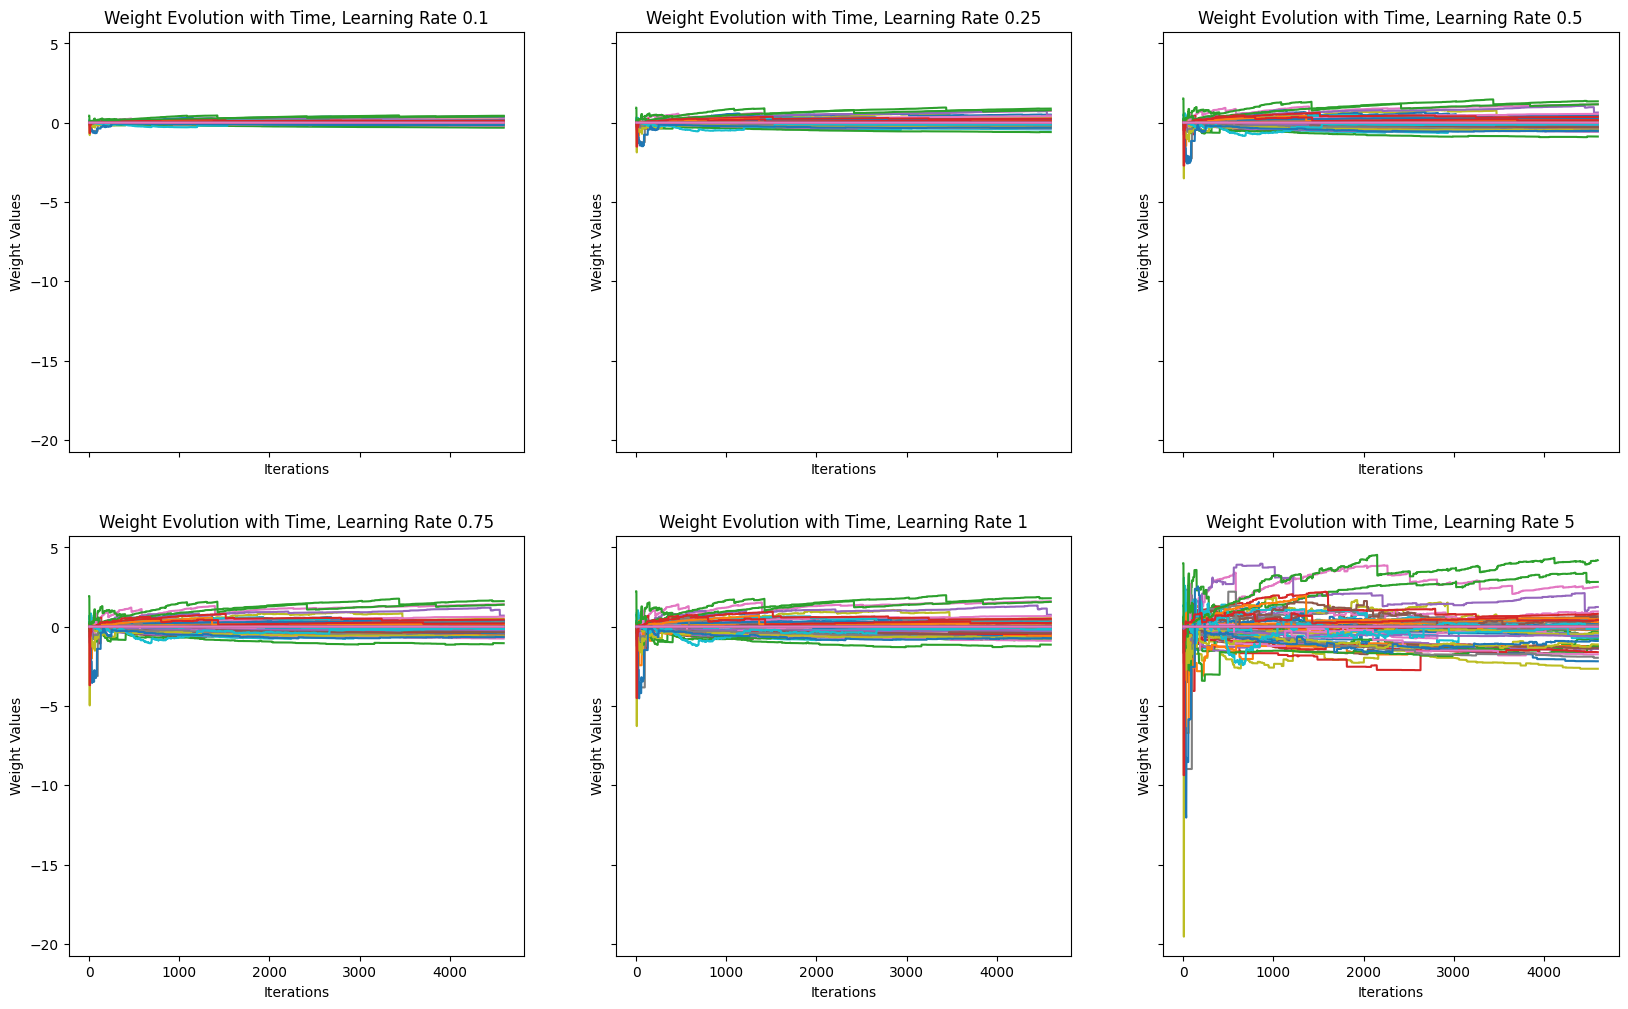

In [9]:
expert_weights_fig: Figure; expert_weights_axs: list[Axes]
expert_weights_fig, expert_weights_axs = plt.subplots(2, 3, sharex=True, sharey=True)
expert_weights_fig.set_figwidth(20)
expert_weights_fig.set_figheight(12)
for i in range(len(expert_weights)):
    axs: Axes = expert_weights_axs[i // 3][i % 3]
    for col in expert_weights[i].columns:
        axs.plot(expert_weights[i].index, expert_weights[i][col], label=col)
    axs.set_title(
        f"Weight Evolution with Time, Learning Rate {expert_learning_rates[i]}"
    )
    axs.set_xlabel("Iterations")
    axs.set_ylabel("Weight Values")
    if dataset == CLOUD:
        axs.legend()
plt.show()